In [1]:
import torch
from torch import nn,optim
from torchvision import models
from mltools import ld,draw

In [2]:
train_iter,val_iter,test_iter=ld.mnist('./data',batch_size=1000) # 获取训练集、验证集和测试集
model=models.resnet18() # 加载模型
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False) # 修改输入通道数
device=torch.device('cuda') # 设置设备

Epoch 1, Training loss 4.33981466293335, Validation loss 4.25127649307251
Epoch 2, Training loss 2.008147716522217, Validation loss 2.0237510204315186
Epoch 3, Training loss 1.0311412811279297, Validation loss 1.1113312244415283
Epoch 4, Training loss 0.6984394788742065, Validation loss 0.7242573499679565
Epoch 5, Training loss 0.549304723739624, Validation loss 0.5750202536582947
Epoch 6, Training loss 0.44176769256591797, Validation loss 0.49085795879364014
Epoch 7, Training loss 0.3640669286251068, Validation loss 0.4117226004600525
Epoch 8, Training loss 0.3597199022769928, Validation loss 0.3863450288772583
Epoch 9, Training loss 0.3061176836490631, Validation loss 0.2965421974658966
Epoch 10, Training loss 0.25639808177948, Validation loss 0.3296162188053131


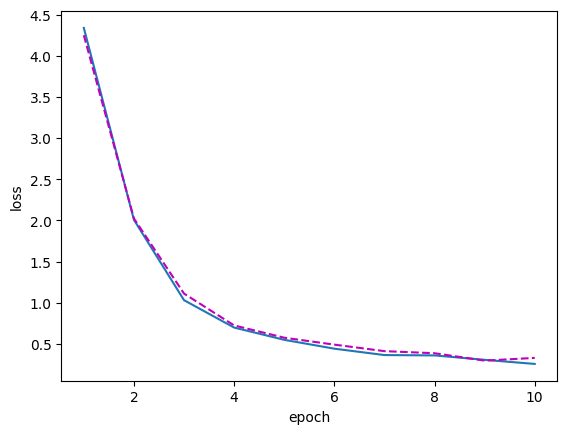

In [3]:
# 训练模型
def train(model,train_iter,val_iter,*,num_epochs,learing_rate,device):
    model.to(device) # 将网络复制到device上
    optimizer=optim.SGD(model.parameters(),learing_rate) # 定义优化器
    loss=nn.CrossEntropyLoss() # 定义损失函数
    animator=draw.Animator(line_num=2,xlabel='epoch',ylabel='loss',xlim=[0, num_epochs+1],ylim=-0.1,legend=['train loss','val loss'])
    for epoch in range(1,num_epochs+1):
        # 计算训练集
        for x,y in train_iter:
            # 运算
            x,y=x.to(device),y.to(device)
            y_train=model(x)
            train_loss=loss(y_train,y)
            # 梯度更新
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
        # 计算验证集
        with torch.no_grad():
            for x,y in val_iter:
                # 运算
                x,y=x.to(device),y.to(device)
                y_val=model(x)
                val_loss=loss(y_val,y)
        animator.add(train_loss.detach().cpu(),val_loss.detach().cpu()) # 添加损失值
train(model,train_iter,val_iter,num_epochs=10,learing_rate=1e-3,device=device)

In [4]:
# 测试模型
def test(model,test_iter,device):
    model.to(device) # 将网络复制到device上
    test_num,real_num=0,0 # 定义测试数量和预测真实数量
    # 测试
    for x,y in test_iter:
        x,y=x.to(device),y.to(device)
        y_test=model(x).argmax(dim=1)
        pred=y==y_test
        test_num+=len(pred)
        real_num+=pred.sum()
    print(f'Accuracy rate:{real_num/test_num}') # 计算测试准确率并输出
test(model,test_iter,device)

Accuracy rate:0.85999995470047


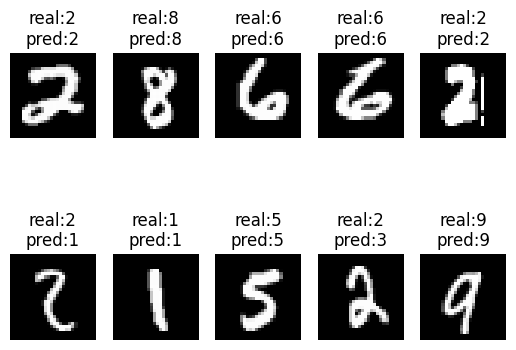

In [5]:
# 预测模型
def predict(model,test_iter,device):
    model.to(device) # 将网络复制到device上
    # 从测试中取10个样本
    x,y=next(iter(test_iter))
    x,y=x[:10].to(device),y[:10].to(device)
    # 预测
    y_test=model(x).argmax(dim=1)
    labels=[f'real:{y[index]}\npred:{y_test[index]}' for index in range(len(y))]
    # 输出样例图
    draw.images(x,labels,shape=(2,5))
predict(model,test_iter,device)